Questions to answer:

Per Year:

What is the overall average voter turnout between 2000 - 2016, per county, then per state

Which counties have the highest / lowest average voter turnout?

voter turnout vs population

What is the avg population of the county compared to the voters on election day

Are there any outliers? Overall:
How consistent is voter turnout based on the party voted for? (i.e. how consistent are the averages for democrat, republican year to year?)

Voter turnout for all the counties within the U.S during 2000 ~2016 election years.

Create a year to year graph of voter turnout vs population

Which counties are the most/least consistent in their turnout?

In [16]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from pprint import pprint

#file locations
election_data_2000_csv = "../../FOR_JINHO_2000.csv"
census_csv = "../../CENSUS_results_FINAL_LOCATIONS_2000.csv"

In [17]:
#read CSV files
election_data_2000= pd.read_csv(election_data_2000_csv)
census_data= pd.read_csv(census_csv)

In [18]:
election_data_2000

,Location,total_votes,2000_republican_votes,2000_democrat_votes
0,"Alabama, Autauga",17208,11993.0,4942.0
1,"Alabama, Baldwin",56480,40872.0,13997.0
2,"Alabama, Barbour",10395,5096.0,5188.0
3,"Alabama, Bibb",7101,4273.0,2710.0
4,"Alabama, Blount",17973,12667.0,4977.0
...,...,...,...,...
3157,"Alaska, District 36",5577,3007.0,1945.0
3158,"Alaska, District 37",5028,2725.0,1821.0
3159,"Alaska, District 38",4976,2467.0,2015.0
3160,"Alaska, District 39",5188,2321.0,2282.0


In [19]:
census_data

,location,State,County,Location,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Alabama, Autauga",Alabama,Autauga,"Alabama, Autauga",44021,44889,45909,46800,48366,49676,...,52405,53277,54135,"54,773","55,227","54,954","54,727","54,893","54,864","55,243"
1,"Alabama, Baldwin",Alabama,Baldwin,"Alabama, Baldwin",141342,144875,147957,151509,156266,162183,...,172404,175827,179406,"183,112","186,558","190,145","194,885","199,183","202,939","207,601"
2,"Alabama, Barbour",Alabama,Barbour,"Alabama, Barbour",29015,28863,28653,28594,28287,28027,...,27757,27808,27657,"27,327","27,341","27,169","26,937","26,755","26,283","25,806"
3,"Alabama, Bibb",Alabama,Bibb,"Alabama, Bibb",19913,21028,21199,21399,21721,22042,...,22438,22705,22941,"22,870","22,745","22,667","22,521","22,553","22,566","22,586"
4,"Alabama, Blount",Alabama,Blount,"Alabama, Blount",51107,51845,52551,53457,54124,54624,...,56240,57055,57341,"57,376","57,560","57,580","57,619","57,526","57,526","57,494"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,"Wyoming, Sweetwater",Wyoming,Sweetwater,"Wyoming, Sweetwater",37552,36899,37428,37450,38026,38739,...,41470,42358,44133,"43,574","43,986","45,002","45,157","44,948","44,719","44,222"
3001,"Wyoming, Teton",Wyoming,Teton,"Wyoming, Teton",18381,18653,18837,19066,19467,19632,...,20472,20988,21232,"21,296","21,414","21,624","22,315","22,773","23,047","23,234"
3002,"Wyoming, Uinta",Wyoming,Uinta,"Wyoming, Uinta",19666,19413,19587,19480,19470,19494,...,20171,20613,21054,"21,089","20,896","20,996","20,951","20,822","20,763","20,682"
3003,"Wyoming, Washakie",Wyoming,Washakie,"Wyoming, Washakie",8252,8068,7988,7976,7960,8022,...,8169,8229,8423,"8,530","8,449","8,409","8,413","8,273","8,278","8,165"


In [20]:
#isolate the relevant data 
census2000 = census_data[['State','location','2000']]
census2000 = census2000.rename(columns={'2000':'total_pop','location':'Location'})
census2000

,State,Location,total_pop
0,Alabama,"Alabama, Autauga",44021
1,Alabama,"Alabama, Baldwin",141342
2,Alabama,"Alabama, Barbour",29015
3,Alabama,"Alabama, Bibb",19913
4,Alabama,"Alabama, Blount",51107
...,...,...,...
3000,Wyoming,"Wyoming, Sweetwater",37552
3001,Wyoming,"Wyoming, Teton",18381
3002,Wyoming,"Wyoming, Uinta",19666
3003,Wyoming,"Wyoming, Washakie",8252


In [21]:
#merge census and election data
merge_df = pd.merge(census2000, election_data_2000, on="Location", how="left")
merge_df

,State,Location,total_pop,total_votes,2000_republican_votes,2000_democrat_votes
0,Alabama,"Alabama, Autauga",44021,17208,11993.0,4942.0
1,Alabama,"Alabama, Baldwin",141342,56480,40872.0,13997.0
2,Alabama,"Alabama, Barbour",29015,10395,5096.0,5188.0
3,Alabama,"Alabama, Bibb",19913,7101,4273.0,2710.0
4,Alabama,"Alabama, Blount",51107,17973,12667.0,4977.0
...,...,...,...,...,...,...
3030,Wyoming,"Wyoming, Sweetwater",37552,15691,9425.0,5521.0
3031,Wyoming,"Wyoming, Teton",18381,10431,5454.0,4019.0
3032,Wyoming,"Wyoming, Uinta",19666,7418,5469.0,1650.0
3033,Wyoming,"Wyoming, Washakie",8252,4051,3138.0,806.0


In [67]:
#1. What is the overall average voter turnout between 2000 - 2016, per county, then per state
# avg voter turn out per county 
merge_df["Avg_Turnout"] = (round(merge_df.total_votes / merge_df.total_pop,2)*100)
merge_df


,State,Location,total_pop,total_votes,2000_republican_votes,2000_democrat_votes,Avg_Turnout
0,Alabama,"Alabama, Autauga",44021,17208,11993.0,4942.0,39.0
1,Alabama,"Alabama, Baldwin",141342,56480,40872.0,13997.0,40.0
2,Alabama,"Alabama, Barbour",29015,10395,5096.0,5188.0,36.0
3,Alabama,"Alabama, Bibb",19913,7101,4273.0,2710.0,36.0
4,Alabama,"Alabama, Blount",51107,17973,12667.0,4977.0,35.0
...,...,...,...,...,...,...,...
3030,Wyoming,"Wyoming, Sweetwater",37552,15691,9425.0,5521.0,42.0
3031,Wyoming,"Wyoming, Teton",18381,10431,5454.0,4019.0,57.0
3032,Wyoming,"Wyoming, Uinta",19666,7418,5469.0,1650.0,38.0
3033,Wyoming,"Wyoming, Washakie",8252,4051,3138.0,806.0,49.0


In [79]:
#just avg turnouts by state
State_Avg_Turnout = round((merge_df.groupby('State')['Avg_Turnout'].mean()))

State_Avg_Voter_Turnout = pd.DataFrame(State_Avg_Turnout)
State_Avg_Voter_Turnout = State_Avg_Voter_Turnout.reset_index()
State_Avg_Voter_Turnout


,State,Avg_Turnout
0,Alabama,38.0
1,Arizona,29.0
2,Arkansas,35.0
3,California,37.0
4,Colorado,46.0
5,Connecticut,44.0
6,Delaware,41.0
7,District of Columbia,35.0
8,Florida,39.0
9,Georgia,31.0


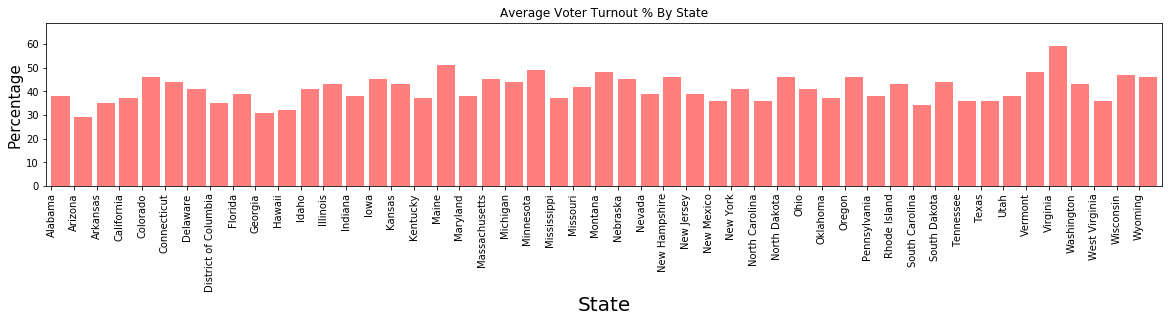

In [125]:
#make a bar graph
Avg_Turnout = State_Avg_Voter_Turnout["Avg_Turnout"]
State =  State_Avg_Voter_Turnout["State"]
plt.figure(figsize=(20,3))
plt.bar(State, Avg_Turnout, color='r', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('Average Voter Turnout % By State')
plt.xlabel('State', fontsize = 20)
plt.ylabel('Percentage',fontsize = 15)
plt.xlim(-0.25, len(State))
plt.ylim(0, max(Avg_Turnout)+10)
plt.show()


In [55]:
 # Save the plot and display it
plt.savefig("Image/avgvoter2000bar.png")
plt.show()

<Figure size 2880x1440 with 0 Axes>

In [76]:
#2. Which counties have the highest / lowest average voter turnout?
print('The state with the highest average voter turnout was :')
print( State_Avg_Voter_Turnout.max())
print('The state with the lowest average voter turnout was :')
print(State_Avg_Voter_Turnout.min())


The state with the highest average voter turnout was :
State          Wyoming
Avg_Turnout         59
dtype: object
The state with the lowest average voter turnout was :
State          Alabama
Avg_Turnout         29
dtype: object


In [81]:
#3. voter turnout vs population
merge_df.head()

,State,Location,total_pop,total_votes,2000_republican_votes,2000_democrat_votes,Avg_Turnout
0,Alabama,"Alabama, Autauga",44021,17208,11993.0,4942.0,39.0
1,Alabama,"Alabama, Baldwin",141342,56480,40872.0,13997.0,40.0
2,Alabama,"Alabama, Barbour",29015,10395,5096.0,5188.0,36.0
3,Alabama,"Alabama, Bibb",19913,7101,4273.0,2710.0,36.0
4,Alabama,"Alabama, Blount",51107,17973,12667.0,4977.0,35.0


In [103]:
#converted the voter population to percentage
merge_df["Avg_Turnout"] = (round(merge_df.total_votes / merge_df.total_pop,2)*100)
merge_df["rep_vote_per"] = (round(merge_df['2000_republican_votes'] / merge_df.total_pop,2)*100)
merge_df["dem_vote_per"] = (round(merge_df['2000_democrat_votes'] / merge_df.total_pop,2)*100)
merge_df["dem_vote_per"] = (round(merge_df['2000_democrat_votes'] / merge_df.total_pop,2)*100)
merge_df["non_voters"] = (round(100-merge_df['Avg_Turnout'],2))
merge_per_df = merge_df[['State','Location','Avg_Turnout','rep_vote_per','dem_vote_per','non_voters']]
merge_per_df

,State,Location,Avg_Turnout,rep_vote_per,dem_vote_per,non_voters
0,Alabama,"Alabama, Autauga",39.0,27.0,11.0,61.0
1,Alabama,"Alabama, Baldwin",40.0,29.0,10.0,60.0
2,Alabama,"Alabama, Barbour",36.0,18.0,18.0,64.0
3,Alabama,"Alabama, Bibb",36.0,21.0,14.0,64.0
4,Alabama,"Alabama, Blount",35.0,25.0,10.0,65.0
...,...,...,...,...,...,...
3030,Wyoming,"Wyoming, Sweetwater",42.0,25.0,15.0,58.0
3031,Wyoming,"Wyoming, Teton",57.0,30.0,22.0,43.0
3032,Wyoming,"Wyoming, Uinta",38.0,28.0,8.0,62.0
3033,Wyoming,"Wyoming, Washakie",49.0,38.0,10.0,51.0


In [149]:
#same table, but grouped by states
state_per = round(merge_per_df.groupby('State').mean(),2)
state_per = pd.DataFrame(state_per)
state_per = state_per.reset_index()
state_per

,State,Avg_Turnout,rep_vote_per,dem_vote_per,non_voters
0,Alabama,37.79,20.45,16.87,62.21
1,Arizona,28.93,14.73,13.00,71.07
2,Arkansas,34.95,17.76,16.29,65.05
3,California,36.84,18.48,16.19,63.16
4,Colorado,45.52,26.02,16.05,54.48
5,Connecticut,44.00,17.12,24.12,56.00
6,Delaware,40.67,19.00,20.67,59.33
7,District of Columbia,35.00,3.00,30.00,65.00
8,Florida,38.52,21.18,16.50,61.48
9,Georgia,30.98,17.86,12.60,69.02


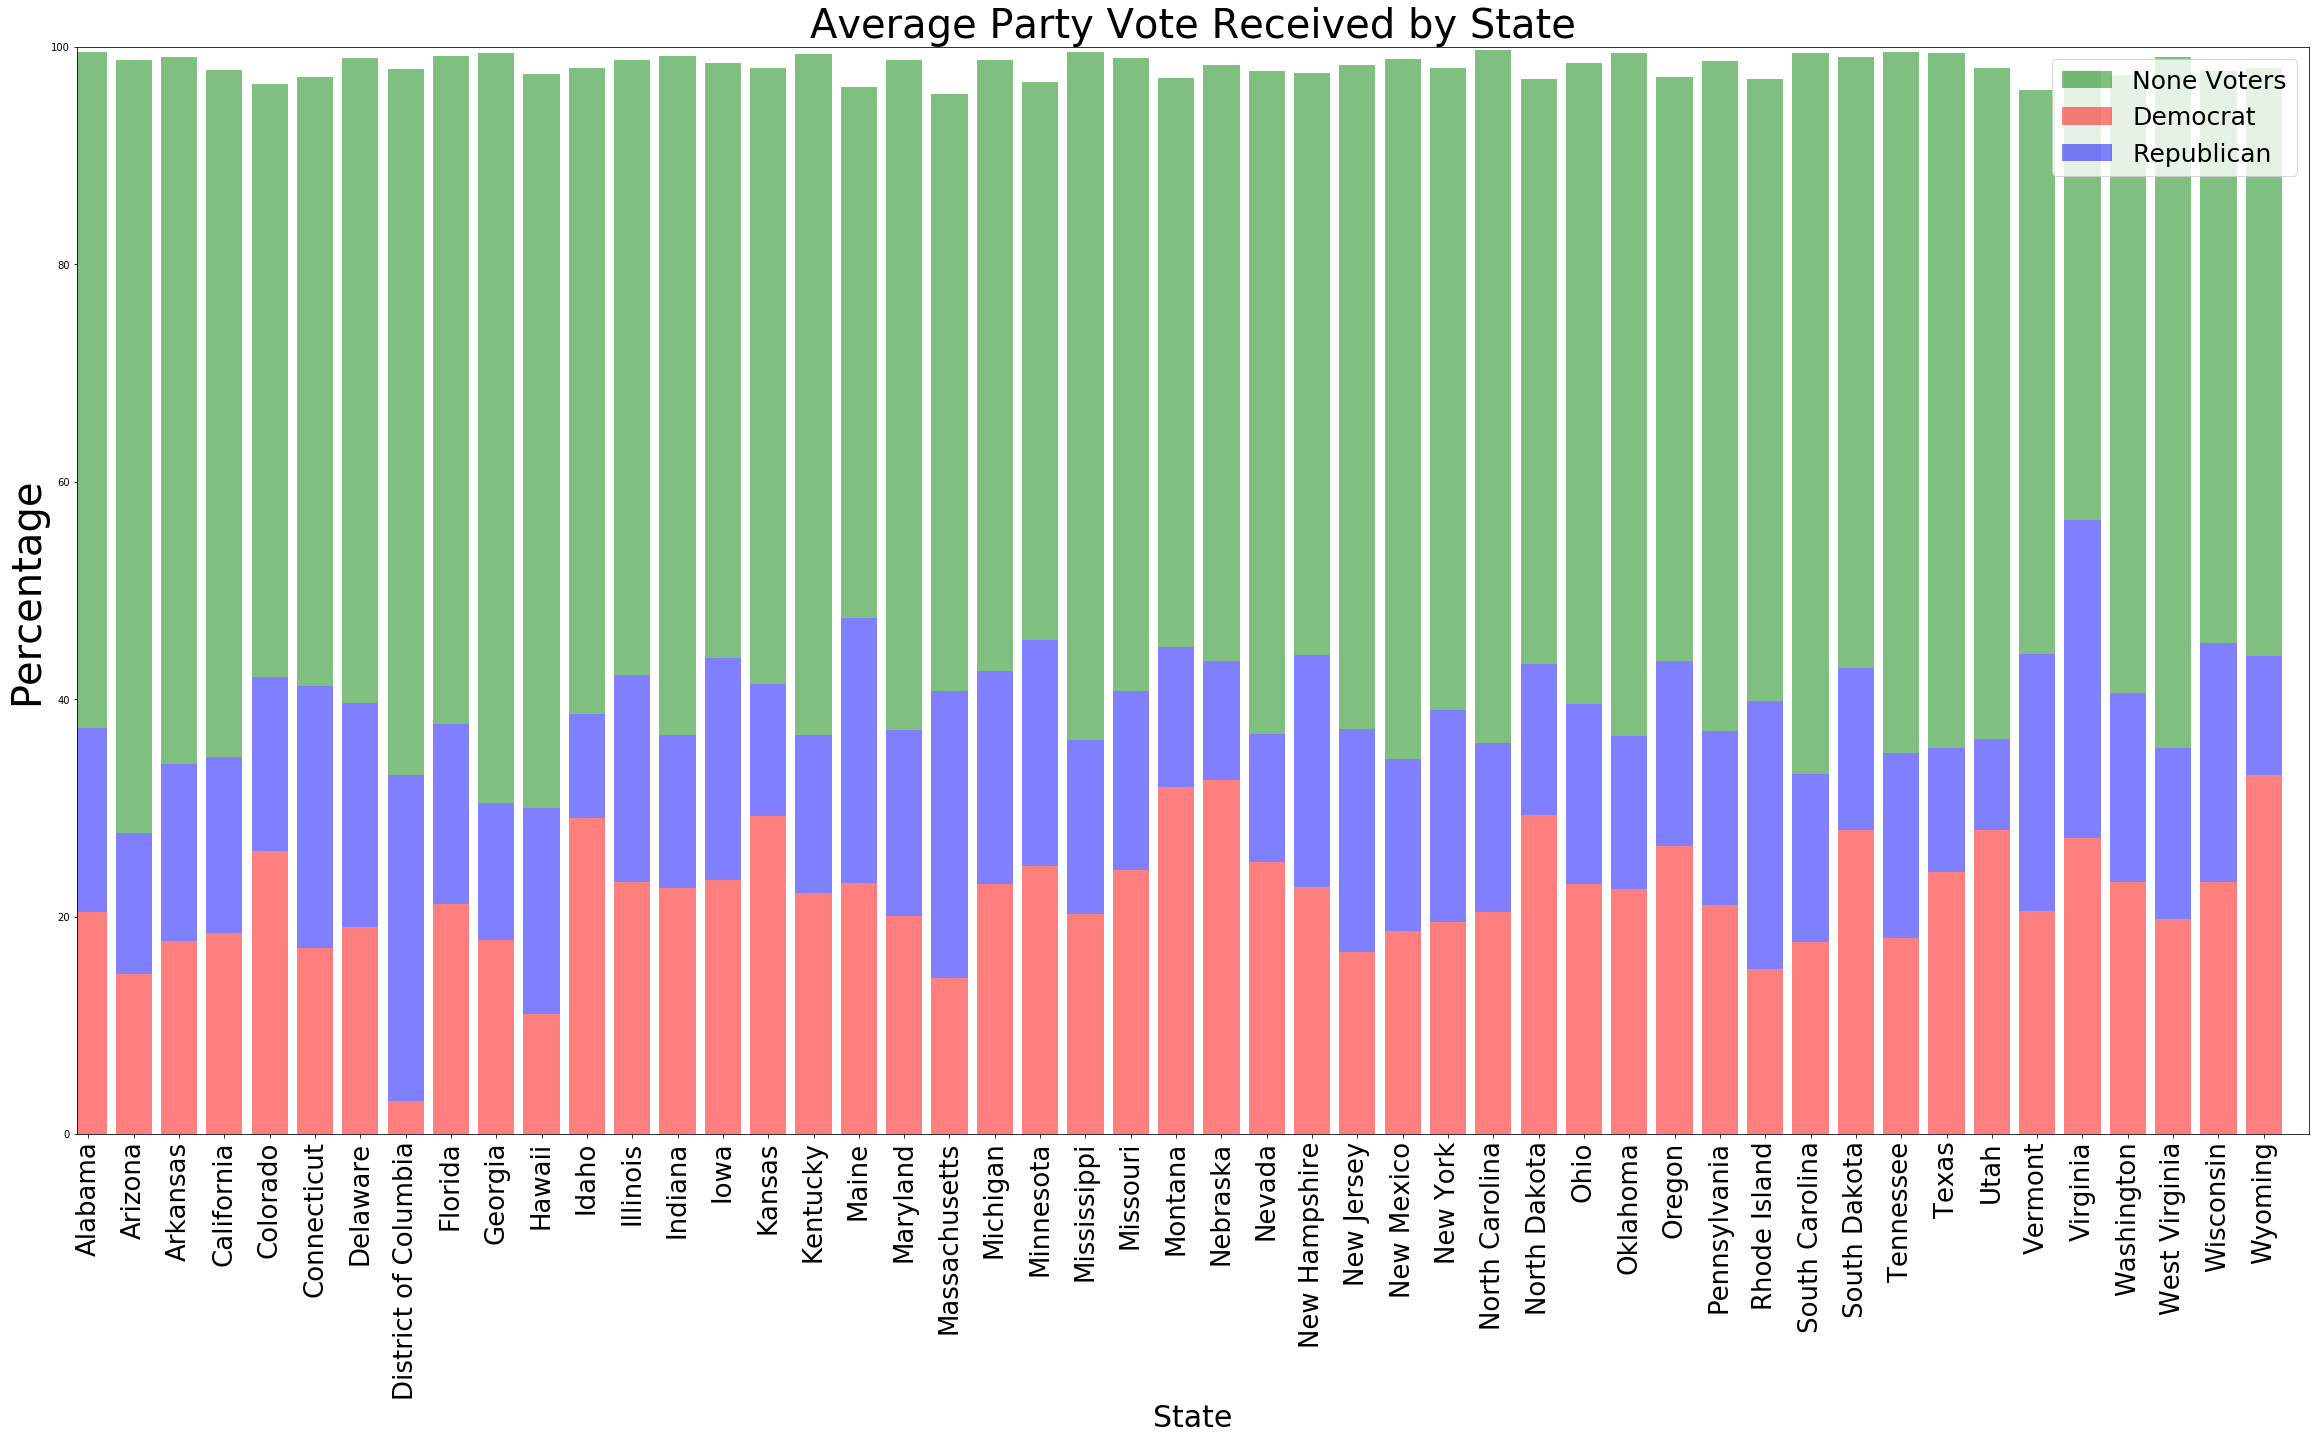

In [158]:
#Stacked Bar graph for each state. 
state =  state_per["State"]
rep_per = state_per['rep_vote_per']
dem_per = state_per['dem_vote_per']
non_per = state_per['non_voters']
both = np.add(rep_per, dem_per).tolist()

p1 = plt.bar(state, rep_per, color='r', alpha=0.5, align="center")
p2= plt.bar(state, dem_per, color='b', alpha=0.5, align="center", bottom = rep_per)
p3 = plt.bar(state, non_per, color='g', alpha=0.5, align="center", bottom = both)

plt.xticks(rotation="vertical", fontsize = 26)
plt.title('Average Party Vote Received by State', fontsize = 40)
plt.xlabel('State', fontsize = 30)
plt.ylabel('Percentage', fontsize = 40)
plt.xlim(-0.25, len(state))
plt.ylim(0,100)
plt.legend((p0[0],p1[0], p2[0]), ('None Voters', 'Democrat','Republican'),prop={'size': 25})
plt.show()